In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import glob
import os
import pandas as pd
import csv

from scipy.ndimage import gaussian_filter1d # Smoothing jagged Gaussian curve

In [ ]:
!pip install lmfit
from lmfit import Model, Parameters

In [ ]:
'''
Import data
'''


path = "/content/drive/MyDrive/Lab Physics/LZ Lab Data"

subpath = {
    "bigLaserEnvelope": f"{path}/Big laser - envelope (gain)",
    "bigLaserSample": f"{path}/Big laser - sample",
    "day2Degen": f"{path}/Day 2 - Degeneracy (with current)",
    "firstTrial": f"{path}/First trial",
    "secondTrial": f"{path}/Second trial"
}

def load_data(folder_path):
  data_dict = {}

  files = glob.glob(os.path.join(folder_path, "*.csv"))
  print(f"Reading {folder_path}: {files}")

  for file in files:
    try:
      file_data = np.genfromtxt(file, delimiter = ",", skip_header = 1)

      time = file_data[:, 0]
      voltage = file_data[:, 1]
      fabry_v = file_data[:, 2]

      filename = os.path.basename(file)
      data_dict[filename] = (time, voltage, fabry_v)

    except Exception as e:
      print(f"Error for {file}: {e}")

  return data_dict

bigLaserEnvelope = load_data(subpath["bigLaserEnvelope"])
bigLaserSample = load_data(subpath["bigLaserSample"])
day2Degen = load_data(subpath["day2Degen"])
firstTrial = load_data(subpath["firstTrial"])
secondTrial = load_data(subpath["secondTrial"])
#print(bigLaserEnvelope)

'''
Define current values needed to show the Zeeman effect
'''
def current_val(folder_path):
  currents = []
  #files = glob.glob(os.path.join(folder_path, "*.csv"))

  for file in folder_path:
    if file.startswith("ZE_") and file.endswith(".csv"):
      current = file[3:-4]
      current = float(current)
      currents.append(current)

  currents = np.array(currents)
  return currents

currents = current_val(day2Degen)
print(currents)

Reading /content/drive/MyDrive/Lab Physics/LZ Lab Data/Big laser - envelope (gain): ['/content/drive/MyDrive/Lab Physics/LZ Lab Data/Big laser - envelope (gain)/ZE_241123_032.csv', '/content/drive/MyDrive/Lab Physics/LZ Lab Data/Big laser - envelope (gain)/ZE_241123_033.csv', '/content/drive/MyDrive/Lab Physics/LZ Lab Data/Big laser - envelope (gain)/ZE_241123_034.csv', '/content/drive/MyDrive/Lab Physics/LZ Lab Data/Big laser - envelope (gain)/ZE_241123_035.csv', '/content/drive/MyDrive/Lab Physics/LZ Lab Data/Big laser - envelope (gain)/ZE_241123_036.csv', '/content/drive/MyDrive/Lab Physics/LZ Lab Data/Big laser - envelope (gain)/ZE_241123_037.csv', '/content/drive/MyDrive/Lab Physics/LZ Lab Data/Big laser - envelope (gain)/ZE_241123_038.csv', '/content/drive/MyDrive/Lab Physics/LZ Lab Data/Big laser - envelope (gain)/ZE_241123_039.csv', '/content/drive/MyDrive/Lab Physics/LZ Lab Data/Big laser - envelope (gain)/ZE_241123_040.csv', '/content/drive/MyDrive/Lab Physics/LZ Lab Data/Big

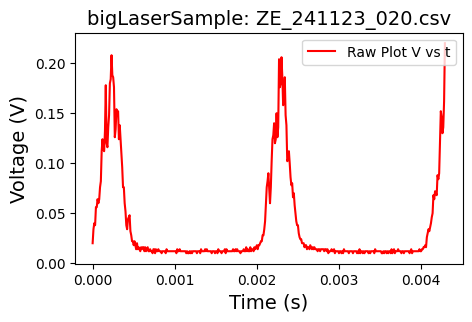

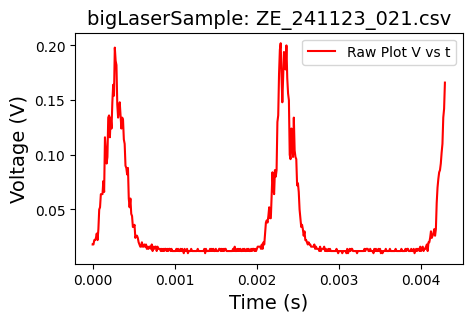

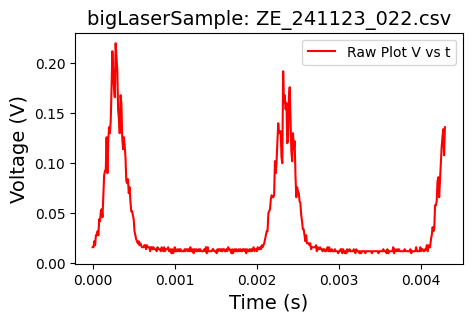

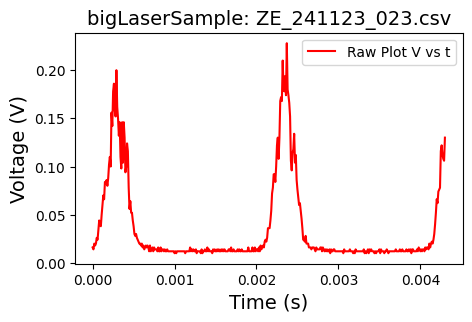

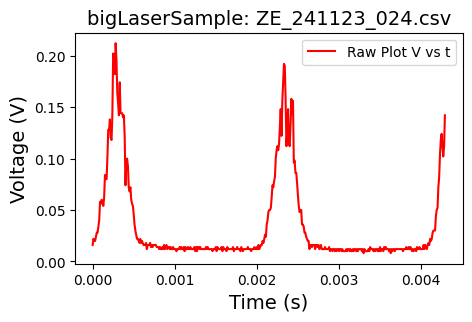

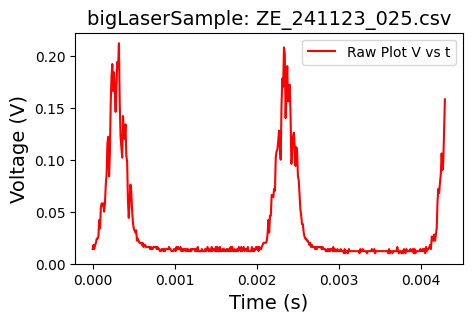

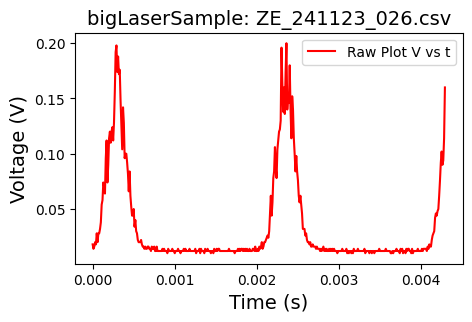

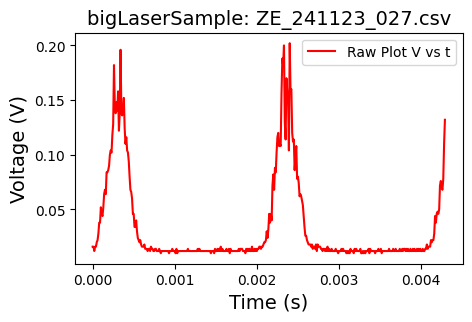

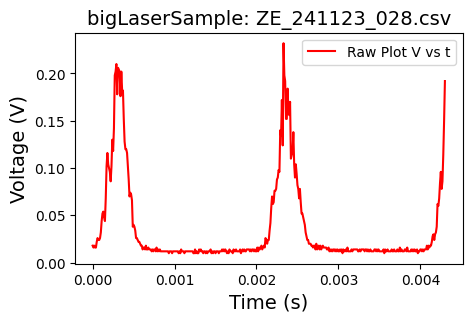

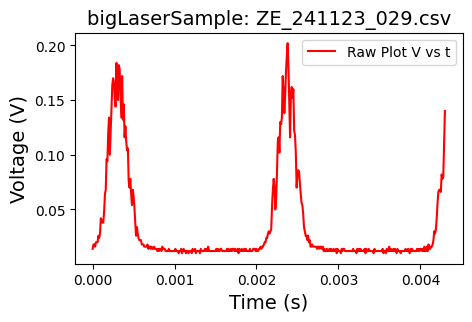

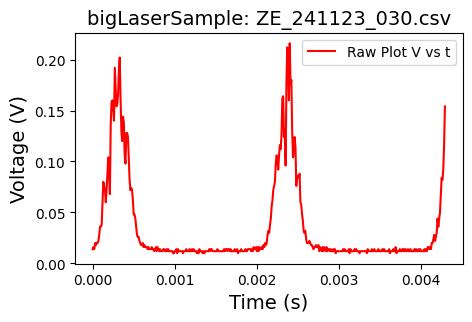

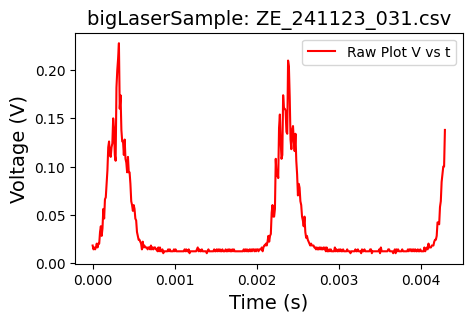

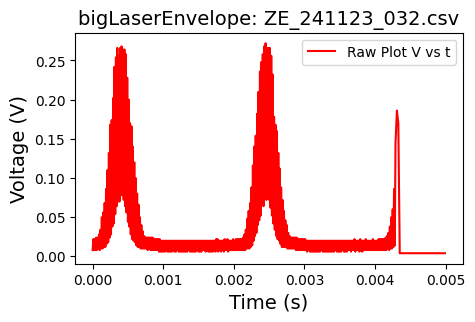

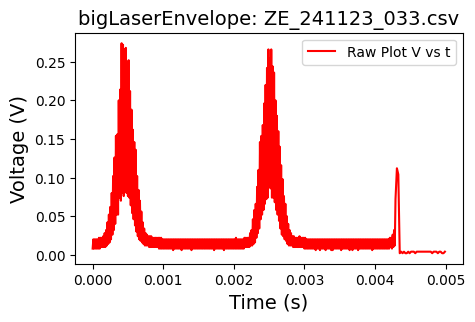

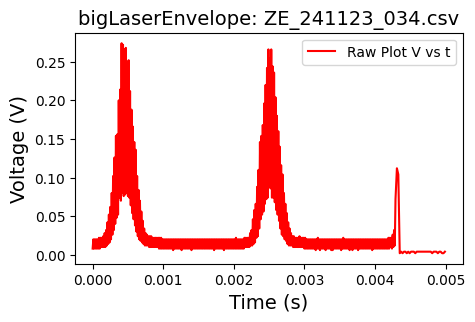

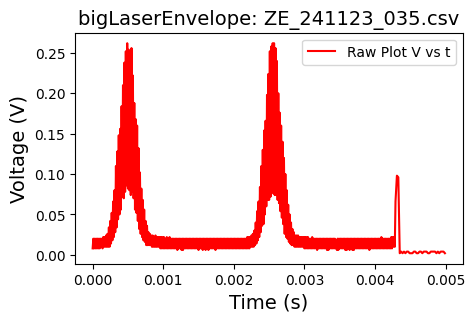

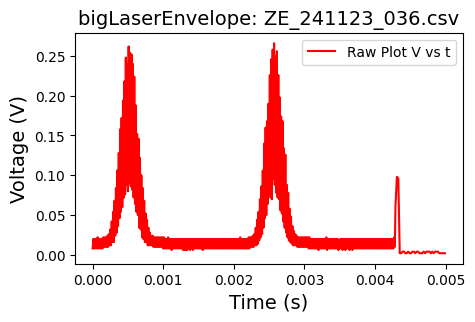

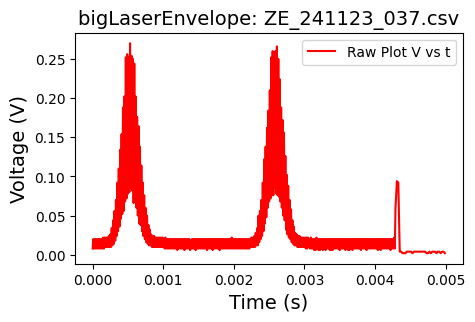

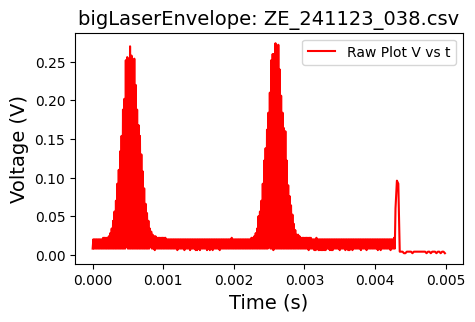

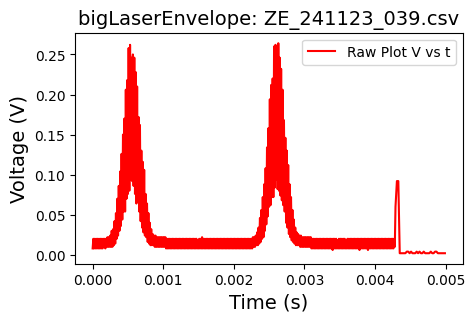

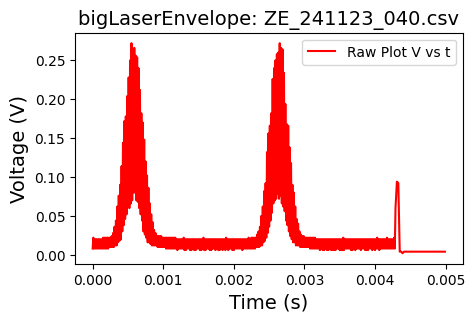

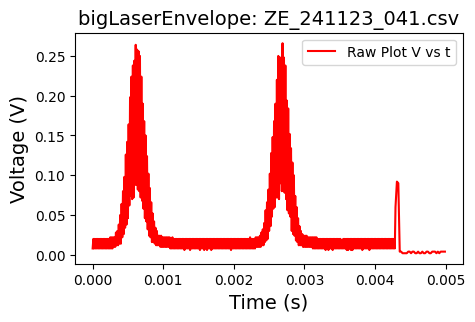

Indices of the peaks: [114 145 336 368]
Conversion ratio: 3363228699551.5693 Hz / s
Mode spacing: 1042600896.8609862
FSR of Fabry: 7466367713.004484


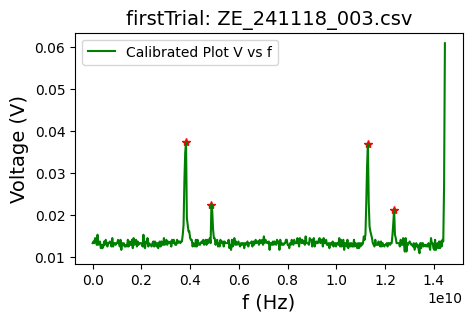

Indices of the peaks: [101 134 324 356]
Conversion ratio: 3378378378378.379 Hz / s
Mode spacing: 1114864864.8648653
FSR of Fabry: 7533783783.783785


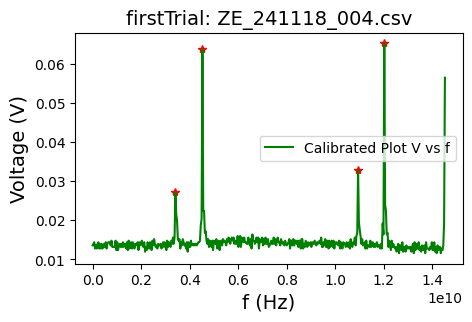

Indices of the peaks: [117 149 339]
Not enough peaks, printing uncalibrated w/ peaks


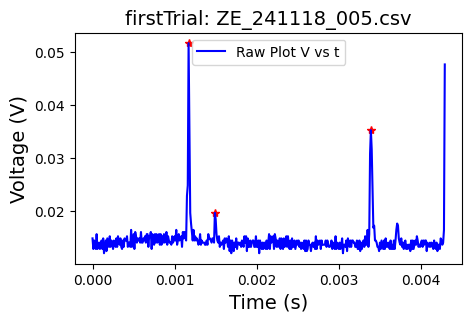

Indices of the peaks: [112 144 334 366]
Conversion ratio: 3378378378378.379 Hz / s
Mode spacing: 1081081081.0810823
FSR of Fabry: 7500000000.000003


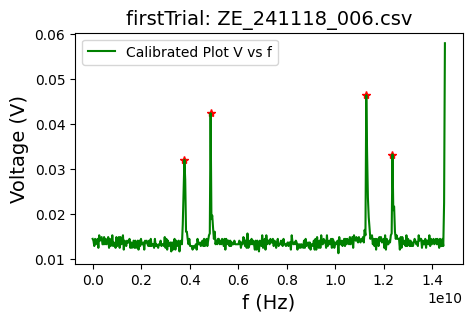

Indices of the peaks: [104 135 326 358]
Conversion ratio: 3363228699551.57 Hz / s
Mode spacing: 1042600896.8609877
FSR of Fabry: 7466367713.004484


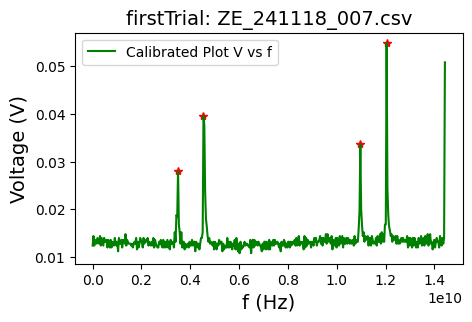

Indices of the peaks: [122 345]
Not enough peaks, printing uncalibrated w/ peaks


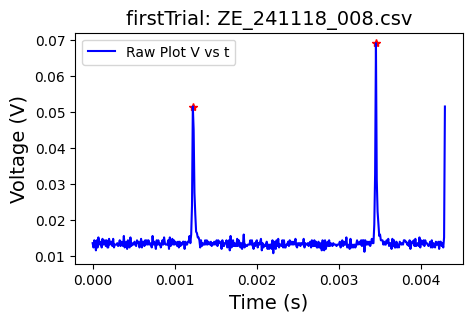

Indices of the peaks: [110 142 332 364]
Conversion ratio: 3378378378378.379 Hz / s
Mode spacing: 1081081081.0810814
FSR of Fabry: 7500000000.000002


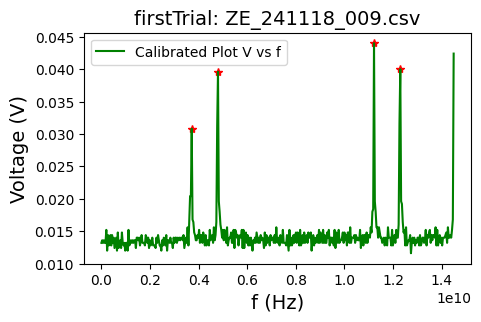

Indices of the peaks: [ 99 132 322 353]
Conversion ratio: 3393665158371.0405 Hz / s
Mode spacing: 1119909502.262443
FSR of Fabry: 7567873303.167421


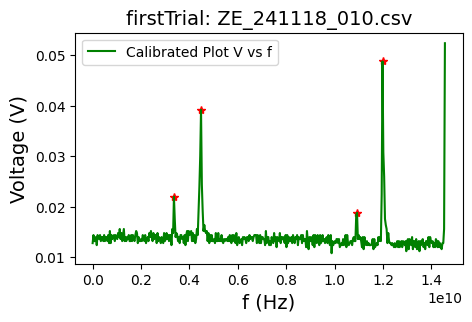

Indices of the peaks: [120 152 342 374]
Conversion ratio: 3378378378378.379 Hz / s
Mode spacing: 1081081081.0810823
FSR of Fabry: 7500000000.000002


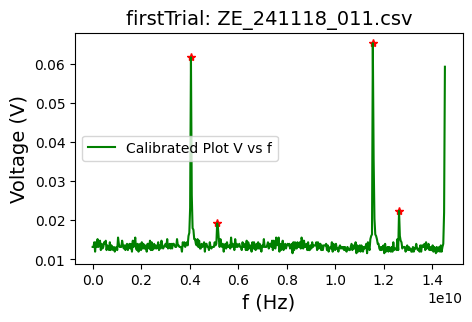

Indices of the peaks: [109 141 332 364]
Conversion ratio: 3363228699551.5693 Hz / s
Mode spacing: 1076233183.856502
FSR of Fabry: 7499999999.999998


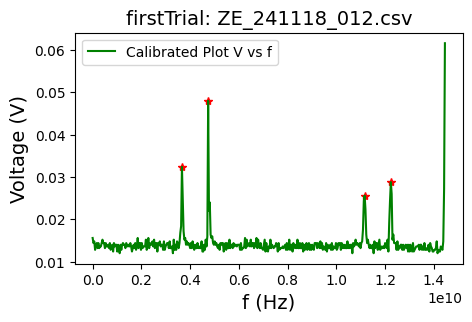

Calibration value for Zeeman from Small Laser Sample: 3374608096317.408
Indices of the peaks: [ 67 337]
Conversion ratio for Envelope: 2777777777777.778 Hz / s


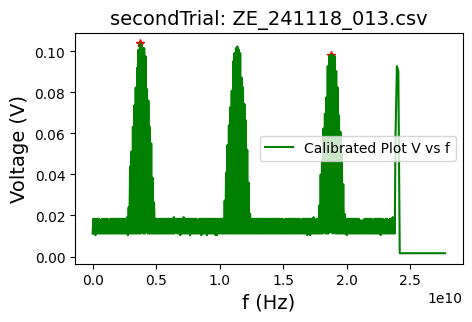

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 34
    # data points      = 120
    # variables        = 3
    chi-square         = 2.0674e-04
    reduced chi-square = 1.7670e-06
    Akaike info crit   = -1586.58442
    Bayesian info crit = -1578.22194
    R-squared          = 0.99167162
[[Variables]]
    a:  0.04484979 +/- 3.8832e-04 (0.87%) (init = 0.04316366)
    b:  3.8394e+09 +/- 5508021.38 (0.14%) (init = 3.833333e+09)
    c:  5.5093e+08 +/- 8441595.74 (1.53%) (init = 1.101852e+09)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, c) = +0.5774
Indices of the peaks: [ 73 343]
Conversion ratio for Envelope: 2777777777777.778 Hz / s


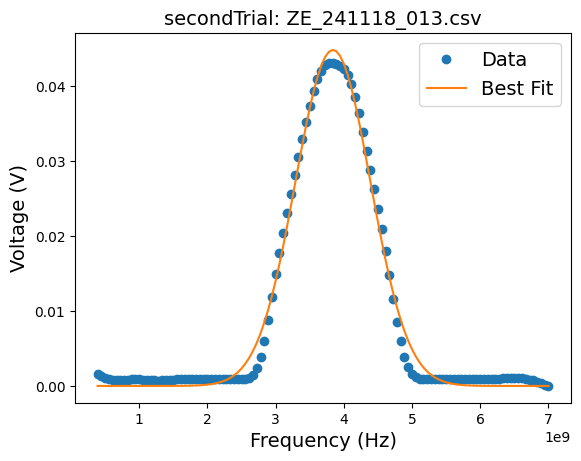

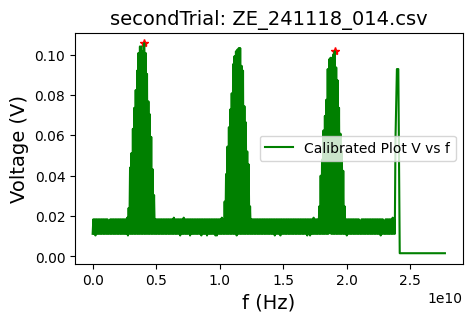

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 41
    # data points      = 120
    # variables        = 3
    chi-square         = 2.3853e-04
    reduced chi-square = 2.0387e-06
    Akaike info crit   = -1569.42042
    Bayesian info crit = -1561.05794
    R-squared          = 0.99082125
[[Variables]]
    a:  0.04568257 +/- 4.1711e-04 (0.91%) (init = 0.04307583)
    b:  3.8633e+09 +/- 5808536.86 (0.15%) (init = 3.833333e+09)
    c:  5.5093e+08 +/- 3491441.50 (0.63%) (init = 1.101852e+09)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, c) = +0.5773
Indices of the peaks: [ 73 343]
Conversion ratio for Envelope: 2777777777777.778 Hz / s


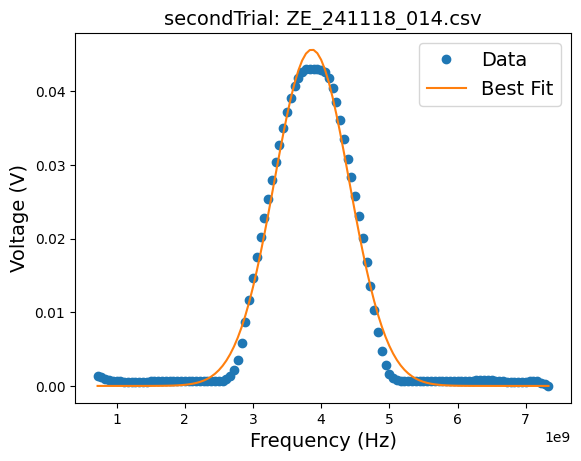

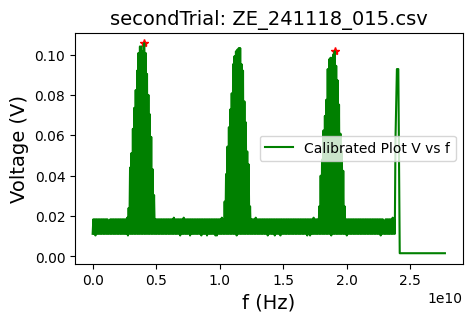

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 40
    # data points      = 120
    # variables        = 3
    chi-square         = 2.5160e-04
    reduced chi-square = 2.1504e-06
    Akaike info crit   = -1563.01858
    Bayesian info crit = -1554.65610
    R-squared          = 0.99036927
[[Variables]]
    a:  0.04579806 +/- 4.2838e-04 (0.94%) (init = 0.04307583)
    b:  3.8658e+09 +/- 5950516.83 (0.15%) (init = 3.833333e+09)
    c:  5.5093e+08 +/- 19020.3850 (0.00%) (init = 1.101852e+09)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, c) = -0.5774
Indices of the peaks: [ 73 343]
Conversion ratio for Envelope: 2777777777777.778 Hz / s


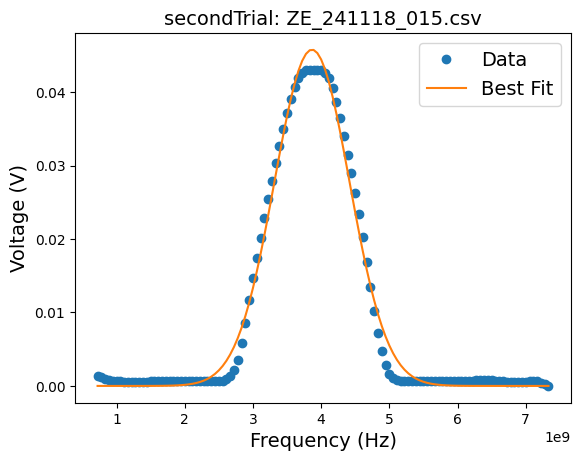

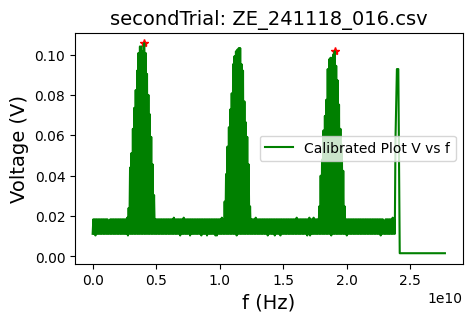

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 120
    # variables        = 3
    chi-square         = 2.5072e-04
    reduced chi-square = 2.1429e-06
    Akaike info crit   = -1563.44044
    Bayesian info crit = -1555.07797
    R-squared          = 0.99041074
[[Variables]]
    a:  0.04578548 +/- 4.2712e-04 (0.93%) (init = 0.04307583)
    b:  3.8673e+09 +/- 5948836.67 (0.15%) (init = 3.833333e+09)
    c:  5.5224e+08 +/- 5938435.07 (1.08%) (init = 1.101852e+09)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, c) = -0.5773
Indices of the peaks: [ 73 343]
Conversion ratio for Envelope: 2777777777777.778 Hz / s


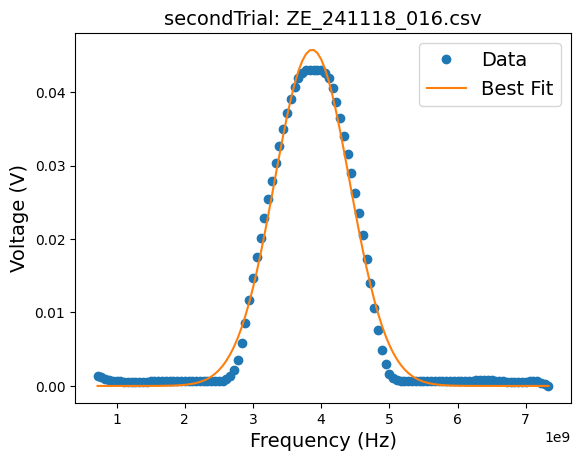

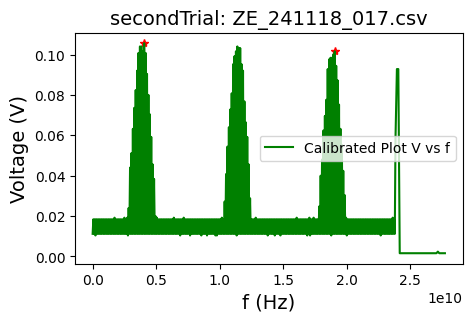

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 120
    # variables        = 3
    chi-square         = 2.1334e-04
    reduced chi-square = 1.8234e-06
    Akaike info crit   = -1582.81511
    Bayesian info crit = -1574.45264
    R-squared          = 0.99181548
[[Variables]]
    a:  0.04563701 +/- 3.9164e-04 (0.86%) (init = 0.04307583)
    b:  3.8722e+09 +/- 5538437.98 (0.14%) (init = 3.833333e+09)
    c:  5.5892e+08 +/- 5539055.31 (0.99%) (init = 1.101852e+09)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, c) = -0.5773
Indices of the peaks: [ 73 343]
Conversion ratio for Envelope: 2777777777777.778 Hz / s


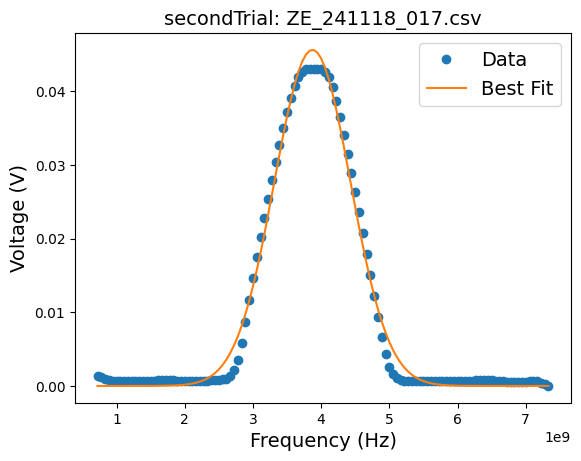

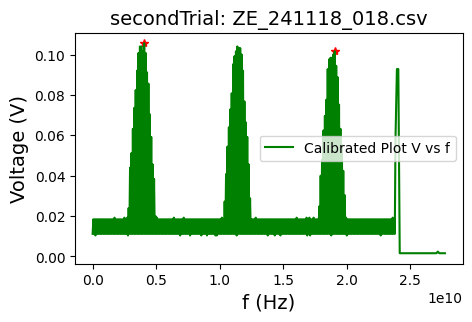

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 120
    # variables        = 3
    chi-square         = 2.3687e-04
    reduced chi-square = 2.0245e-06
    Akaike info crit   = -1570.25911
    Bayesian info crit = -1561.89663
    R-squared          = 0.99101256
[[Variables]]
    a:  0.04582052 +/- 4.1217e-04 (0.90%) (init = 0.04307589)
    b:  3.8772e+09 +/- 5819613.71 (0.15%) (init = 3.833333e+09)
    c:  5.6028e+08 +/- 5820126.91 (1.04%) (init = 1.101852e+09)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, c) = -0.5773
Indices of the peaks: [ 73 343]
Conversion ratio for Envelope: 2777777777777.778 Hz / s


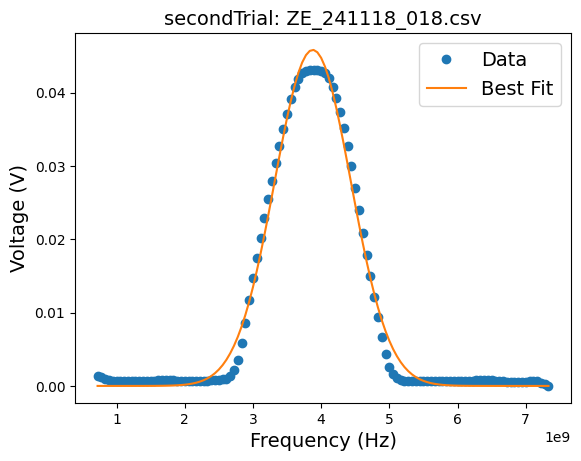

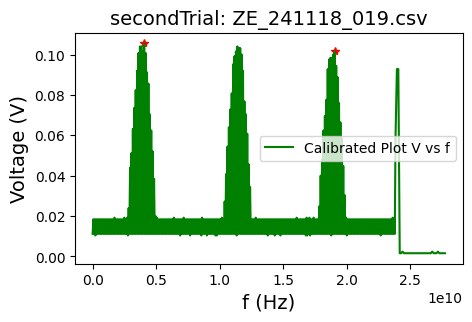

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 120
    # variables        = 3
    chi-square         = 2.5271e-04
    reduced chi-square = 2.1599e-06
    Akaike info crit   = -1562.49349
    Bayesian info crit = -1554.13101
    R-squared          = 0.99046672
[[Variables]]
    a:  0.04577907 +/- 4.2351e-04 (0.93%) (init = 0.04307589)
    b:  3.8837e+09 +/- 6047872.95 (0.16%) (init = 3.833333e+09)
    c:  5.6615e+08 +/- 6047517.60 (1.07%) (init = 1.101852e+09)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, c) = -0.5773
Indices of the peaks: [ 73 343]
Conversion ratio for Envelope: 2777777777777.778 Hz / s


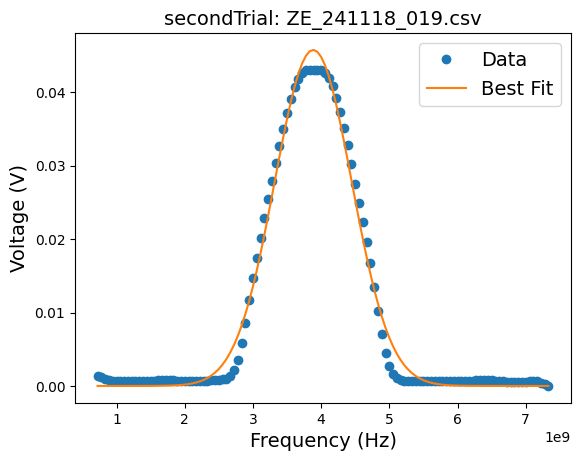

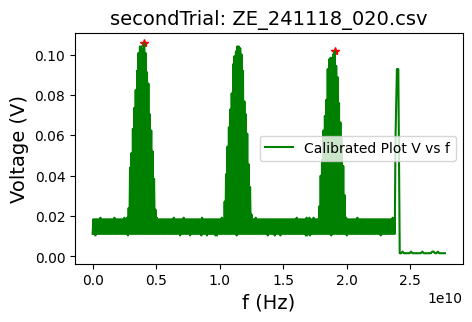

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 120
    # variables        = 3
    chi-square         = 2.3430e-04
    reduced chi-square = 2.0026e-06
    Akaike info crit   = -1571.56837
    Bayesian info crit = -1563.20590
    R-squared          = 0.99117031
[[Variables]]
    a:  0.04579382 +/- 4.0726e-04 (0.89%) (init = 0.04319913)
    b:  3.8852e+09 +/- 5829278.39 (0.15%) (init = 3.888889e+09)
    c:  5.6765e+08 +/- 5829455.42 (1.03%) (init = 1.101852e+09)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, c) = -0.5773
Indices of the peaks: [ 73 343]
Conversion ratio for Envelope: 2777777777777.778 Hz / s


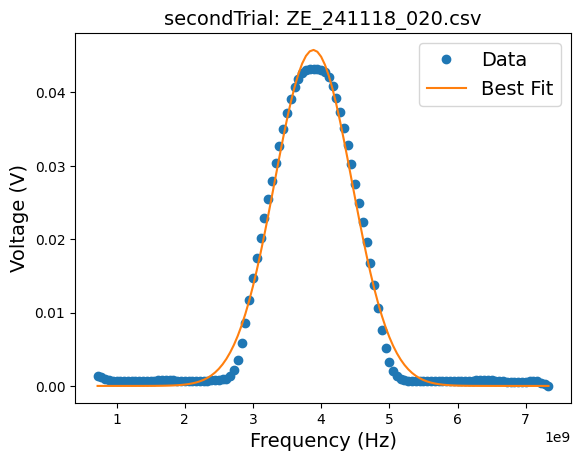

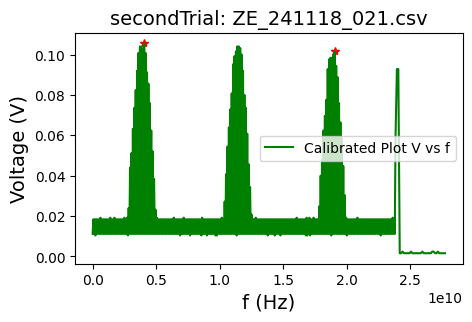

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 120
    # variables        = 3
    chi-square         = 2.5966e-04
    reduced chi-square = 2.2193e-06
    Akaike info crit   = -1559.23475
    Bayesian info crit = -1550.87228
    R-squared          = 0.99028298
[[Variables]]
    a:  0.04587588 +/- 4.2788e-04 (0.93%) (init = 0.04319913)
    b:  3.8897e+09 +/- 6137937.99 (0.16%) (init = 3.888889e+09)
    c:  5.6991e+08 +/- 6137519.24 (1.08%) (init = 1.101852e+09)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, c) = -0.5773
Indices of the peaks: [ 73 343]
Conversion ratio for Envelope: 2777777777777.778 Hz / s


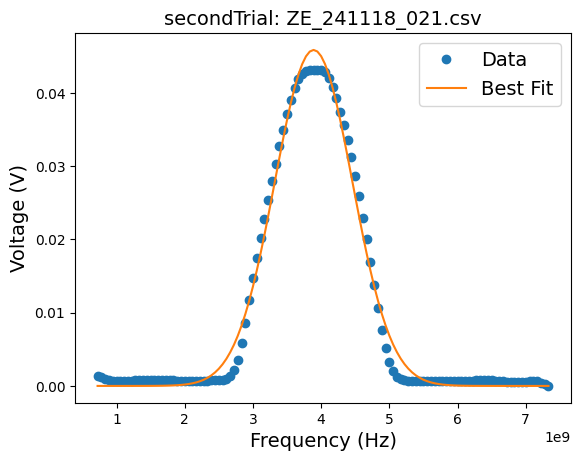

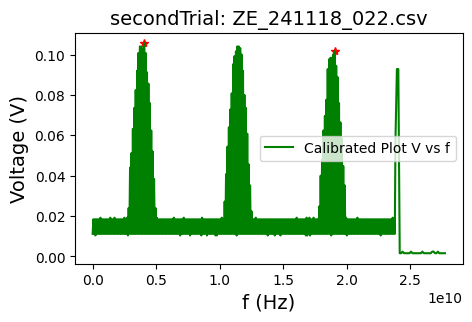

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 120
    # variables        = 3
    chi-square         = 2.5577e-04
    reduced chi-square = 2.1860e-06
    Akaike info crit   = -1561.04878
    Bayesian info crit = -1552.68631
    R-squared          = 0.99042665
[[Variables]]
    a:  0.04586472 +/- 4.2448e-04 (0.93%) (init = 0.04319913)
    b:  3.8900e+09 +/- 6095788.37 (0.16%) (init = 3.888889e+09)
    c:  5.7040e+08 +/- 6095374.04 (1.07%) (init = 1.101852e+09)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, c) = -0.5773
The average mode spacing, or the FSR of the laser: (1079931573.4936287 ± 9373642.117797216) Hz
From our FSR of the laser value 1079931573.4936287 Hz we calculate L of the cavity to be 0.13889768915149228 m, which seems very reasonable for a 633 nm laser.
The average Δv (velocity): (834.4861286436259 ± 3.683665104149656) m/s
The doppler broadening: (1318303520.7640216 ±

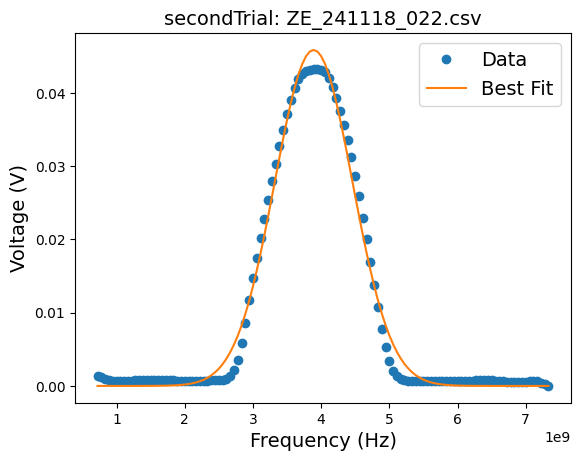

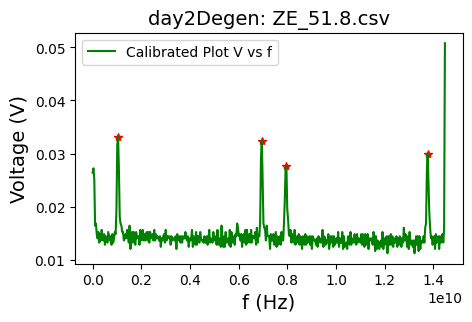

Indices of the peaks: [ 45 190 249 392]


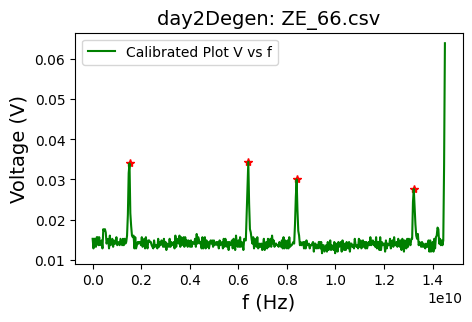

Indices of the peaks: [ 50 195 254 398]


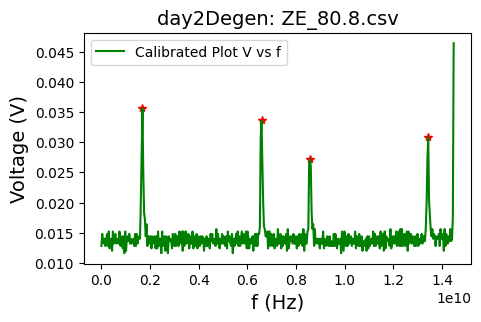

Indices of the peaks: [ 54 200 259 402]


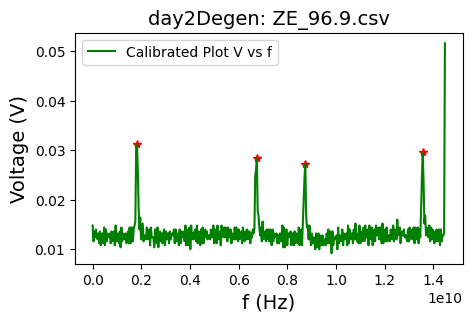

Indices of the peaks: [  2  63 178 208 267 409]


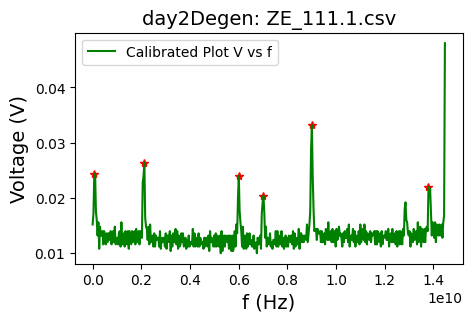

Indices of the peaks: [ 66 182 270 385]


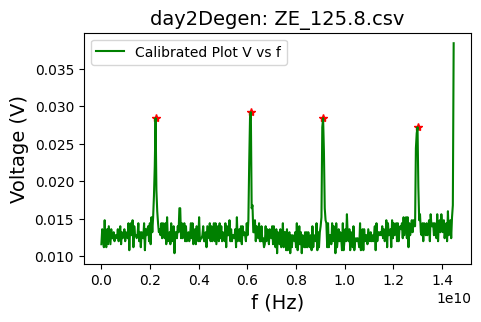

Indices of the peaks: [ 71 186 275 389]


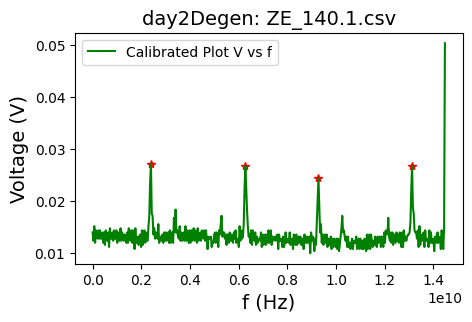

Indices of the peaks: [103 160 308 363]


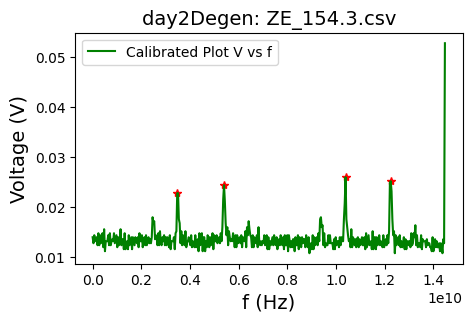

Indices of the peaks: [100 157 304 360]


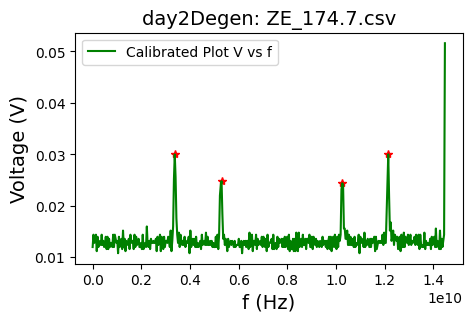

Indices of the peaks: [105 161 309 364]


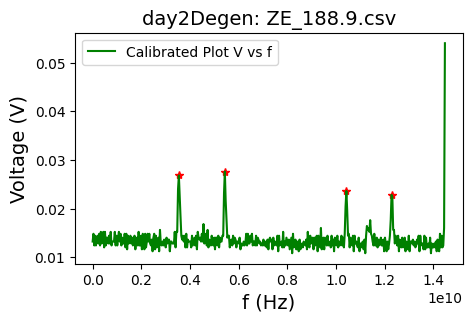

Delta_nu_vals: [1.01238243e+09 1.99101878e+09 1.99101878e+09 1.99101878e+09
 3.88079931e+09 2.96965512e+09 3.00340121e+09 4.99441998e+09
 4.96067390e+09 4.99441998e+09]


<Figure size 500x300 with 0 Axes>

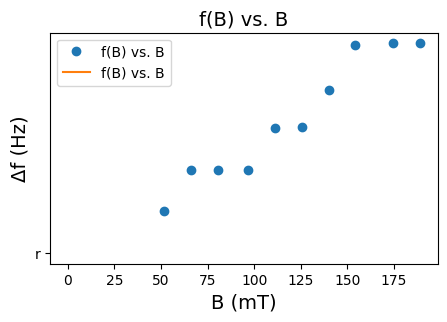

Indices of the peaks: [ 31 206 236 408]


AttributeError: 'numpy.ndarray' object has no attribute 'append'

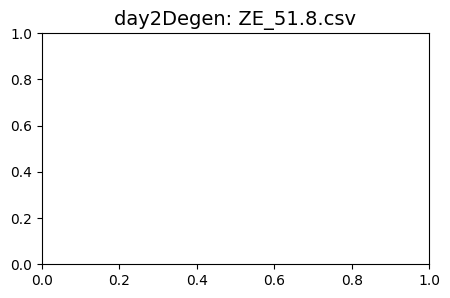

In [ ]:
'''
Graph data, calibrate, and extract points; please note that while this cell says "error" when run, all the functions, calculations,
and graphs follow through as intended. I am guessing I tried appending into an array like a list somewhere that caused an error, this
error has no effect on the performance of the functions.
'''

index = {
  "bigLaserEnvelope": "1",
  "bigLaserSample": "2",
  "day2Degen": "3",
  "firstTrial": "4",
  "secondTrial": "5"
}

delta_f = 7.5e9
calibration_ratio = []
gaussian_x = []
gaussian_y = []
c_vals = []
delta_nu_vals = []
mode_spacing_vals = []

def gaussian(x, a, b, c):
  return a * np.exp(-(x - b)**2 / (2* c**2))

def graph_normal_data(folder_name, folder_label):
  #calibration_ratio = []

  for file,(time, voltage, fabry_v) in folder_name.items():
      mask = voltage > 0

      x_data = time[mask]
      y_data = voltage[mask]

      #y_data = y_data > 0
      #x_data = x_data[y_data]

      z_data = fabry_v

      plt.figure(figsize=(5,3))

      plt.title(f"{folder_label}: {file}", fontsize = 14)
      indexNum = index[folder_label]

      #peaks
      if indexNum in ["1", "2"]: #for big laser just plot
        plt.plot(x_data, y_data, 'r', label = "Raw Plot V vs t")
        plt.xlabel("Time (s)", fontsize = 14)
        plt.ylabel("Voltage (V)", fontsize = 14)
        plt.legend(fontsize = 10)
        plt.show()
        continue

      if indexNum == "3": # Zeeman effect
        prom = 0.005
        height = 0.02
        dist = 30

      if indexNum == "4": # small laser sample
        prom = None
        height = 0.018
        dist = 3

      if indexNum == "5": #small laser envelope
        prom = 0.03
        height = 0.06
        dist = 150

      #else:
      #  continue

      peaks, properties = sp.signal.find_peaks(y_data, prominence = prom, height = height, distance = dist)
      print("========\nIndices of the peaks:", peaks)
      #print("Properties:", properties)
      x_peaks = x_data[peaks]
      y_peaks = y_data[peaks]

# For Zeeman
      if len(x_peaks) >= 4 and indexNum == "3":
        cal_x_data = x_data * cal
        cal_x_peaks = x_peaks * cal

        #cal_x_peaks = np.sort(cal_x_peaks)

        delta_nu = cal_x_peaks[2] - cal_x_peaks[1] #
        delta_nu_vals.append(delta_nu)

        plt.plot(cal_x_peaks, y_peaks, 'r*')
        plt.plot(cal_x_data, y_data, 'g', label = "Calibrated Plot V vs f")
        plt.xlabel("f (Hz)", fontsize = 14)
        plt.ylabel("Voltage (V)", fontsize = 14)
        plt.legend(fontsize = 10)
        plt.show()

        continue

# For small laser sample
      if len(x_peaks) >= 4 and indexNum == "4":
        delta_t = x_peaks[3] - x_peaks[1]
        ratio = delta_f / delta_t

        calibration_ratio.append(ratio) ############
        #if ratio not in calibration_ratio:
          #calibration_ratio.append(ratio)
        #calibration_ratio.append(ratio)
        #calibration_ratio = np.array(calibration_ratio)
        #cal = np.mean(calibration_ratio)

        print(f"Conversion ratio: {ratio} Hz / s")

        #calibrate time to frequency
        cal_x_data = x_data * ratio
        cal_x_peaks = x_peaks * ratio

        #calculate mode spacing and FSR of Fabry
        mode = cal_x_peaks[1] - cal_x_peaks[0]
        FSR_Fabry = cal_x_peaks[2] - cal_x_peaks[0]
        mode_spacing_vals.append(mode)
        print(f"Mode spacing: {mode}")
        print(f"FSR of Fabry: {FSR_Fabry}") #

        plt.plot(cal_x_peaks, y_peaks, 'r*')
        plt.plot(cal_x_data, y_data, 'g', label = "Calibrated Plot V vs f")
        plt.xlabel("f (Hz)", fontsize = 14)
        plt.ylabel("Voltage (V)", fontsize = 14)
        plt.legend(fontsize = 10)
        plt.show()

        continue

# For small laser envelope

      if len(x_peaks) == 2 and indexNum == "5":
        delta_t = (x_peaks[1] - x_peaks[0]) / 2 # divide by 2 because I can't find the second peak
        ratio = delta_f / delta_t
        print(f"Conversion ratio for Envelope: {ratio} Hz / s")

        #calibrate time to frequency
        cal_x_data = x_data * ratio
        cal_x_peaks = x_peaks * ratio

        plt.plot(cal_x_peaks, y_peaks, 'r*')
        plt.plot(cal_x_data, y_data, 'g', label = "Calibrated Plot V vs f")
        plt.xlabel("f (Hz)", fontsize = 14)
        plt.ylabel("Voltage (V)", fontsize = 14)
        plt.legend(fontsize = 10)
        plt.show()

        gaussian_x.append(cal_x_data)
        gaussian_y.append(y_data)

# Gaussian fitting

        first_peak = peaks[0]
        window = 60
        start = max(first_peak - window, 0)
        end = min(first_peak + window, len(cal_x_data))

        x_peak_range = cal_x_data[start:end]
        y_peak_range = y_data[start:end]
        y_smooth = gaussian_filter1d(y_peak_range, sigma = 2) # Solution I searched for online
        baseline = np.min(y_smooth)
        y_clean = y_smooth - baseline

        x = x_peak_range
        y = y_clean

        params = Parameters()

        #a = height
        #b = position of the center of the peak
        #c = width of the curve

        height_guess = np.max(y_clean)
        height_min = np.min(y_clean)
        height_max = height_guess + 1

        center_guess = x[np.argmax(y_clean)]
        center_min = np.min(x)
        center_max = np.max(x)

        width_guess = (np.max(x) - np.min(x)) / 6 # 6 bc/ c = STD DEV, so ~6 STD DEV
        width_min = width_guess / 2
        width_max = width_guess * 2

        #params.add('x', vary = True, value = , min = , max = )
        params.add('a', vary = True, value = height_guess, min = height_min, max = height_max)
        params.add('b', vary = True, value = center_guess, min = center_min, max = center_max)
        params.add('c', vary = True, value = width_guess, min = width_min, max = width_max)

        model = Model(gaussian)

        result = model.fit(y, x = x, params = params)

        print(result.fit_report())                            #prints a fit report

        best_fit = result.best_fit                            #Is the best-fit model
        c_val = result.params['c'].value
        c_vals.append(c_val)

        #slope_bestfit = result.params['slope'].value         #The best-fit slope (I could do this for any parameter)
        #center_uncertainty = result.params['slope'].stderr   #lmfit's estimated uncertainty in the best-fit slope

        #Plot input data and best-fit
        plt.figure()
        plt.title(f"{folder_label}: {file}", fontsize = 14)
        plt.plot(x, y, "o", label = "Data")
        plt.plot(x, result.best_fit, label = "Best Fit")
        plt.xlabel("Frequency (Hz)", fontsize = 14)
        plt.ylabel("Voltage (V)", fontsize = 14)
        plt.legend(fontsize = 14)

        continue

      else:
        print(f"Not enough peaks, printing uncalibrated w/ peaks")
        plt.plot(x_peaks, y_peaks, 'r*')
        plt.plot(x_data, y_data, 'b', label = "Raw Plot V vs t") #"o"
        plt.xlabel("Time (s)", fontsize = 14)
        plt.ylabel("Voltage (V)", fontsize = 14)
        plt.legend(fontsize = 10)
        plt.show()

def graph_voltage_data(folder_name, folder_label):
  for file,(time, voltage, fabry_v) in folder_name.items():
      x_data = time
      #y_data = voltage
      z_data = fabry_v

      plt.figure(figsize=(5,3))
      plt.title(f"{folder_label}: {file}", fontsize = 14)
      plt.plot(x_data, z_data, 'r', label = "Raw Plot V vs f")
      plt.xlabel("Time (s)", fontsize = 14)
      plt.ylabel("Voltage (V)", fontsize = 14)
      plt.legend(fontsize = 10)
      plt.show()

graph_normal_data(bigLaserSample, "bigLaserSample") #!!!!
graph_normal_data(bigLaserEnvelope, "bigLaserEnvelope") #!!!!

graph_normal_data(firstTrial, "firstTrial")
cal = np.mean(calibration_ratio)
print(f"Calibration value for Zeeman from Small Laser Sample: {cal}")

graph_normal_data(secondTrial, "secondTrial")

def mode(mode_spacing_vals):
  avg_mode = np.mean(mode_spacing_vals)
  N = len(mode_spacing_vals)
  S = np.std(mode_spacing_vals)
  u = S / np.sqrt(N)

  return avg_mode, u

avg_mode, u_mode = mode(mode_spacing_vals)
print(f"The average mode spacing, or the FSR of the laser: ({avg_mode} ± {u_mode}) Hz")

# Making sure my mode spacing is reasonable for the L of the laser cavity
speed_of_light = 3e8

def laser_cavity():
  L = speed_of_light / (2 * avg_mode)
  return L

L = laser_cavity()
print(f"From our FSR of the laser value {avg_mode} Hz we calculate L of the cavity to be {L} m, which seems very reasonable for a 633 nm laser.")

lambda_o = 633e-9
f_o = speed_of_light / lambda_o

def FWHM(c_vals):
  widths = []
  velocities = []
  for c in c_vals:
    width = 2 * np.sqrt(2 * np.log(2)) * c
    widths.append(width)

    velocity = (width * speed_of_light) / f_o
    velocities.append(velocity)

  avg_velocity = np.mean(velocities)
  avg_width = np.mean(widths)

  N = len(velocities)
  S_w = np.std(widths)
  S_v = np.std(velocities)

  u_w = S_w / np.sqrt(N)
  u_v = S_v / np.sqrt(N)

  return avg_velocity, u_v, avg_width, u_w, velocities

avg_velocity, u_v, avg_width, u_w, velocities = FWHM(c_vals)
print(f"The average Δv (velocity): ({avg_velocity} ± {u_v}) m/s")
print(f"The doppler broadening: ({avg_width} ± {u_w}) Hz")

w_accepted = 1.5e+9
v_accepted = (w_accepted * speed_of_light) / f_o

def compare_v():
  error = np.abs((avg_velocity - v_accepted) / v_accepted) * 100
  return error

error = compare_v()
print (f"The error percentage compared to true value of Δv = {v_accepted} m/s calculated from true value of doppler broadening {w_accepted} Hz: {error}%")

graph_normal_data(day2Degen, "day2Degen")

delta_nu_vals = np.array(delta_nu_vals)
print(f"Delta_nu_vals: {delta_nu_vals}")

def graph_zeeman():
  x_data = currents #technically B, I just confused them when naming
  y_data = delta_nu_vals

  y_data = np.sort(y_data)

  plt.figure(figsize=(5,3))

  plt.figure(figsize=(5,3))
  plt.title(f"f(B) vs. B", fontsize = 14)
  plt.plot(x_data, y_data, "o", 'r', label = "f(B) vs. B")
  plt.xlabel("B (mT)", fontsize = 14)
  plt.ylabel("Δf (Hz)", fontsize = 14)
  plt.legend(fontsize = 10)
  plt.show()

graph_zeeman()

graph_normal_data(day2Degen, "day2Degen") #!!!!

print(f"Calibration ratios: {calibration_ratio}, N = {len(calibration_ratio)}")

FSR vals: [np.float64(1042600896.8609862), np.float64(1114864864.8648653), np.float64(1081081081.0810823), np.float64(1042600896.8609877), np.float64(1081081081.0810814), np.float64(1119909502.262443), np.float64(1081081081.0810823), np.float64(1076233183.856502)]
N FSR vals: 8


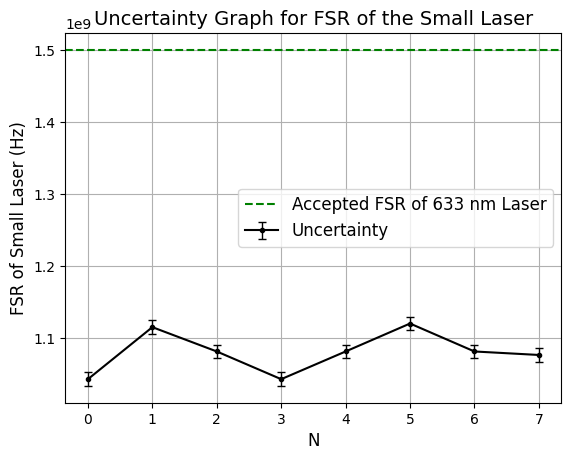

In [ ]:
FSR_actual = 1.5e9
print(f"FSR vals: {mode_spacing_vals}")
print(f"N FSR vals: {len(mode_spacing_vals)}")
FSR_list = list(mode_spacing_vals)
x = list(range(len(FSR_list)))
y = FSR_list

u_FSR = [u_mode] * len(FSR_list)

fig=plt.figure()
plt.errorbar(x, y, yerr = u_FSR, linestyle = "-", marker = "o", markersize = 3, c = 'black', elinewidth = 1, capsize = 3, label = "Uncertainty")
plt.axhline(y = FSR_actual, color = 'g', linestyle = "--", label = "Accepted FSR of 633 nm Laser")
plt.title("Uncertainty Graph for FSR of the Small Laser", fontsize = 14)
plt.xlabel("N", fontsize = 12)
plt.ylabel("FSR of Small Laser (Hz)", fontsize = 12)
plt.legend(fontsize = 12)

plt.grid()

Velocity vals: [np.float64(821.2107851945071), np.float64(821.2107848759397), np.float64(821.2107848711578), np.float64(823.1725288882698), np.float64(833.1248521505282), np.float64(835.1563851168354), np.float64(843.8968957457749), np.float64(846.1365673726226), np.float64(849.5102098788371), np.float64(850.2314923417854)]
N Velocity vals: 10


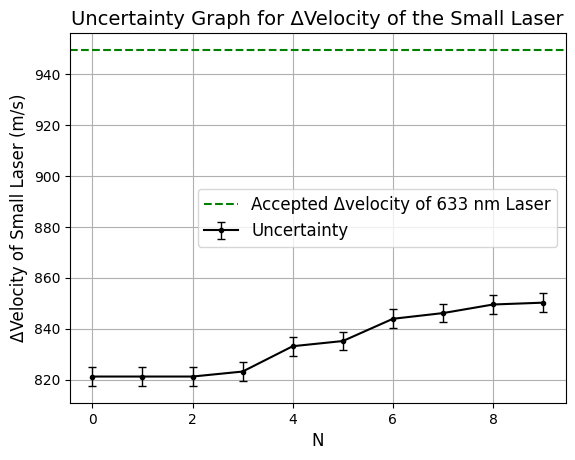

In [ ]:
v_actual = 949.5
print(f"Velocity vals: {velocities}")
print(f"N Velocity vals: {len(velocities)}")
vel_list = list(velocities)
x = list(range(len(velocities)))
y = vel_list

u_vel = [u_v] * len(vel_list)

fig=plt.figure()
plt.errorbar(x, y, yerr = u_vel, linestyle = "-", marker = "o", markersize = 3, c = 'black', elinewidth = 1, capsize = 3, label = "Uncertainty")
plt.axhline(y = v_actual, color = 'g', linestyle = "--", label = "Accepted Δvelocity of 633 nm Laser")
plt.title("Uncertainty Graph for ΔVelocity of the Small Laser", fontsize = 14)
plt.xlabel("N", fontsize = 12)
plt.ylabel("ΔVelocity of Small Laser (m/s)", fontsize = 12)
plt.legend(fontsize = 12)

plt.grid()

In [ ]:
'''
Office Hours Notes
'''
# 1. Can I apply the conversion factor of firstTrial to secondTrial? How about big laser sample, and if I were somehow able to find
# a conversion factor can I apply is to the big laser envelope data.

#For the big laser I don't need to do any conversions. I need to show that the mode spacing is much much narrower as the laser resonator is longer. FSR = nc / 2L so if the laser resonator is longer then the FSR decreases.

# 2. How would calibration work for the zeeman effect data.
# For the zeeman effect we should have done the measurement in envelope mode. Because sample mode only gives the laser modes
# at a specific time, while envelope mode does it over time. I have to identify the laser modes between the two differnt gain curves
# and locate the zeeman pair (and not confuse with the repetition caused by the Fabry)

# Still need to convert time into frequency? Apply the calibration from the small laser with the magnetic field.
# So the index 0, 2 peaks or index 1,3 peaks would give the zeeman effect.
# The zeeman effect implies that the splitting of the gain curve is linear to the magnetic field. f(B) whereby delta frequency on the
# y-axis and B on the x-axis
# delta E = (quantum constants) * B, so E = h(frequency) so frequency and B are linearly proportional
# -> Google "zeeman splitting" hyperphysics link

# So if I plot (0,2) and (1,3) both should show some kind of a linear relationship

# 3.Clarify objective of the lab of laser mode difference, fastest velocity, and zeeman effect.

#For velocity, the width of the gain curve is delta v whereby v is velocity
# I can apply the same conversion factor from the sample data and then convert. I can find the peaks of the gain curve in which
# the distance between the peaks is 7.5 GHz. (which would be the equivalent of recalibrating). I need to fit with the Gaussian and
# then find the width of the Gaussian. Then that width is the width of the gain curve. Filter out the horizontal line is the gain curve (like the flat line
# composed of plot points) so that I can apply the Gaussian fitting.

# plt.plot(x_data, y_data, "o" #the o is the )

'\nOffice Hours Notes\n'